# Detecting Quantum Errors
- Quantum error correction is used to protect quantum information from errors due to **decoherence and other quantum noise**
- This task is to implement the *bit-flip code* and the *sign-flip code* for quantum circuits

In [600]:
from qiskit import *
import random as random
import numpy as np
import matplotlib as mt
from IPython.display import Image
from qiskit.tools.visualization import plot_bloch_multivector,plot_histogram
print("Qiskit:",qiskit.__version__)
print("Numpy:",np.__version__)
print("Matplotlib:",mt.__version__)
%matplotlib inline

Qiskit: 0.16.1
Numpy: 1.19.4
Matplotlib: 3.1.1


# Libraries used
- **qiskit** - version : 0.16.1
    - The main library used for the implementation of the given task was *qiskit* by IBM. 
    - Inbuilt methods for the plotting of states, measurements and gate operations were used to implement the tasks given.
- **numpy** - version : 1.19.4 and **random**
    - numpy and random was used for used for random number generation in the sub-task 2 for obtaining the probabilities of error gates.
- **matplotlib** - version : 3.1.1
    - For plotting of the results obtained in the simulation
- **IPython.display.Image** - method
    - This method was used to display one image in the code 

# Subtask 1
- Creating the Bell State ( a maximally entangled state )
 $$ \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

The Bell State


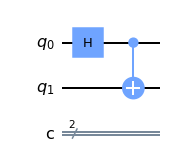

In [2]:
# creating a quantum circuit with 2 quantum and 
# 2 classical bits
Q = QuantumCircuit(2,2) 
Q.h(0) # applying the hadamard gate on Qubit 0
Q.cx(0,1) # applying the controlled-not gate with 
          # control as 0 and target as 1 
print("The Bell State")
Q.draw(output = 'mpl') # visualizing the circuit

- Measuring and visualizing the probabilities of measurement

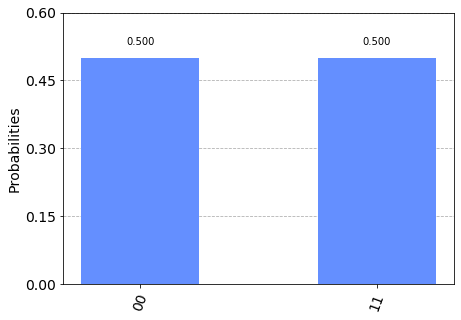

In [3]:
# Plotting on the histogram
Qplot = Q 
Qplot.measure([0,1],[0,1])
counts = execute(Q,backend= Aer.get_backend('qasm_simulator'),shots=2000).result().get_counts()
plot_histogram(counts)

- We can see that the maximally entangled Bell state has indeed been prepared  

# Subtask 2
- Adding arbitrary *error* gates for each qubit, just before the CNOT gate
- Note : each qubit's channel of transfer is treated **different** and separate error probabilities have been defined for them both
-  **THOUGHT** 
    - Since the number of choices for each qubit is 3 and we have 2 qubits, we would have a total of 9 possible combinations for our gates.
    - We can *map* each gate to a number and then pick that number from a list for each qubit
    - The gate mapped to the number is attached to the qubit with the corresponding probability
    - The *dirichlet* function is used to generate random probabilities which sum up to one 
    - These probability values are passed as **weights** to a choice function which generates the random item from list
- **MAPPING NUMBERS TO GATES** $$1:I$$
$$ 2 : X$$
$$ 3 : Z$$

In [571]:
def gate_params():
    '''RETURNS: a randomly generated 2-tuple consisting of 
       numbers from [1,2,3] which map to a
       unitary quantum gate'''
    
    # pick for the first qubit 
    p1 = np.random.dirichlet(np.ones(3), size = 1)
    print("Probabilities are :",p1)
    n1 = random.choices([1,2,3],weights = p1[0],k=1)[0]
    
    # now pick for second qubit 
    p2 = np.random.dirichlet(np.ones(3), size = 1)
    print("Probabilities are :",p2)
    n2 = random.choices([1,2,3],weights = p2[0],k=1)[0]
    
    #choice
    print("Numbers chosen are :",n1,n2)
    return (n1,n2)


In [572]:
def add_gate(Q,q,n):
    '''PARAMETERS : Q-> quantum circuit
                    q-> qubit number
                    i-> gate number
       RETURNS: Quantum circuit with attached gate'''
    if(n==1):
        Q.i(q)
    elif(n==2):
        Q.x(q)
    elif(n==3):
        Q.z(q)
    else:
        raise Exception("Incorrect Gate parameter specified.")
        return 
    return Q
def attach_gates(Q,numbers):
    '''
    PARAMETERS: Q-> QuantumCircuit, numbers-> 2-tuple containing numbers
    RETURNS : QuantumCircuit with attached gates
    is returned '''
    if len(numbers)!=2:
        raise Exception("Incorrect size of tuple")
        return
    # get gate numbers
    g1 = numbers[0]
    g2 = numbers[1]
    if(type(g1)!= int or type(g2)!=int):
        raise TypeError("Incorrect values in numbers.")
        return
    Q = add_gate(Q,0,g1)
    Q = add_gate(Q,1,g2)
    
    #return circuit
    return Q
    

Probabilities are : [[0.16035322 0.61073947 0.22890731]]
Probabilities are : [[0.77469157 0.20881492 0.01649351]]
Numbers chosen are : 3 1


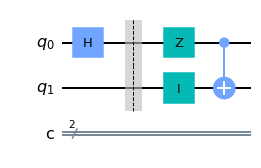

In [576]:
Q = QuantumCircuit(2,2)
numbers = gate_params()
Q.h(0)
Q.barrier()
# attach gates 
Q = attach_gates(Q,numbers)
Q.cnot(0,1)
Q.draw(output='mpl')

# Subtask 3
- The number of total combinations that we would have pertaining to the 2 qubits is 9
- These nine combinations are shown below -

All the possible errors that may occur in the channel :


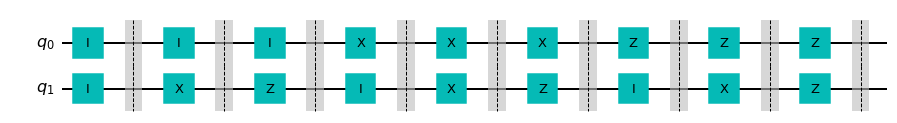

In [5]:
gates = QuantumCircuit(2)
for i in range(1,4):
    for j in range(1,4):
        gates = add_gate(gates,0,i)
        gates = add_gate(gates,1,j)
        gates.barrier()
print("All the possible errors that may occur in the channel :")
gates.draw(output='mpl')

## Observations

### Qubit 1 (control)
- Qubit 1 needs to be corrected for *only phase* flips as the state i.e. |+> for qubit 1 would be affected pertatining to **Z** gate error, as it flips the **relative phase of the bit**, encountered in the channel - 
$$Z|+\rangle = |-\rangle > correction\ needed$$
- No correction code is required for the bit corresponding to the gate **X** as |+> is actually an eigen state for our gate **X** -
$$X|+\rangle = |+\rangle > no\ correction\$$

### Qubit 2 (target)
- Coming on to the Qubit 2, since the state for the qubit is only |0>, no phase correction code is required pertaining to gate **Z** for that qubit, as $$Z|0\rangle=|0\rangle > no\ correction$$ operator has no change for the |0> state. 
- But for **X** gate, the bit flip error correction code must be applied for the Qubit 2 as the gate would actually affect the state |0> by flipping it to |1>, $$X|0\rangle = |1\rangle > correction\ needed$$

# Assumption for probabilities
- Although the probabilities corresponding to introduction of noise in the original circuit were produced randomly by **dirichlet function**, a limitation to that approach was that the probabilities of errors can be high.
- For the implementation of the bit-flip and phase-flip codes for correction of one qubit error, the assumption that probability of error is *low* should hold true.
- Pertaining to the point 2, probabilities of X and Z are sampled until there sum is < 0.35 to satisfy the assumption


### X does not affect qubit 1

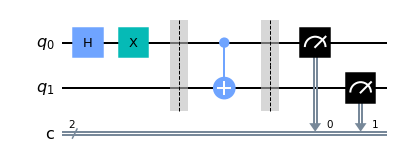

{'00': 500, '11': 500}


In [577]:
q = QuantumCircuit(2,2)
q.h(0)
q.x(0)
q.barrier()
q.cx(0,1)
q.barrier()
q.measure([0,1],[0,1])
# q.measure([1,2],[1,2])
display(q.draw(output='mpl'))
counts = execute(q,backend=Aer.get_backend('qasm_simulator'),shots=1000).result().get_counts()
print(counts)

### Z does not affect qubit 2

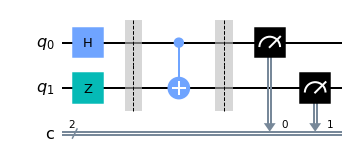

{'00': 482, '11': 518}


In [578]:
q = QuantumCircuit(2,2)
q.h(0)
q.z(1)
q.barrier()
q.cx(0,1)
q.barrier()
q.measure([0,1],[0,1])
# q.measure([1,2],[1,2])
display(q.draw(output='mpl'))
counts = execute(q,backend=Aer.get_backend('qasm_simulator'),shots=1000).result().get_counts()
print(counts)

### Probability function

In [579]:
def get_probabilities():
    '''RETURNS: error probabilities for the qubit channel
    TYPE : dict , key: qubit numbers 
                  value: list of probabilities'''
    p1 = np.random.dirichlet(np.ones(3), size = 1)
    while p1[0][1] + p1[0][2] > 0.35:
        p1 = np.random.dirichlet(np.ones(3), size = 1)
    print("Probabilities are :",p1)
    # now pick for second qubit 
    p2 = np.random.dirichlet(np.ones(3), size = 1)
    while p2[0][1] + p2[0][2] > 0.35:
        p2 = np.random.dirichlet(np.ones(3), size = 1)
    print("Probabilities are :",p2)
    # probabilities of errors for channel
    return {'q0':p1[0],'q1':p2[0]}

In [580]:
# Getting error probabilities for the qubit 1 and qubit 2
p = get_probabilities()
channel1 = {'X':p['q0'][1],'Z':p['q0'][2]}
channel2 = {'X':p['q1'][1],'Z':p['q1'][2]}
print("For channel1:",channel1)
print("For channel2:",channel2)

Probabilities are : [[0.82704845 0.08935494 0.08359662]]
Probabilities are : [[0.83099312 0.00788684 0.16112005]]
For channel1: {'X': 0.08935493650134428, 'Z': 0.0835966175971309}
For channel2: {'X': 0.007886835250121002, 'Z': 0.16112004746615838}


### Noise function
- A thing to note is that attaching *I* operator is **equivalent** to attaching **X for Q1** and **Z for Q2** as *|+> doesn't get affected by X* and *|0> doesn't get affected by Z*


- This assumption is made on the premise that noise was introduced **before** CNOT gate application


- So, the cases when Q1 is affected by *Z* noise and Q2 is affected by *X* noise are handled in the 
**add_channel_noise function**

In [598]:
def add_channel_noise(Q,probs,channel,show_noise = False):
    '''PARAMETERS: Q-> QuantumCircuit with 3 quantum and 3 classical bits
                   probs-> a dictionary conatining prob. of error for 
                           channel 2 corresponding to X and Z gates
                   channel-> an interger specifying which channel to add noise
                   show_noise -> Boolean to determinew whether to display the noise or not
       RETURNS: a Quantum Circuit with randomly attached noise'''
    if(channel == 1):
        p = probs['Z']
    else:
        p = probs['X'] # we only care for the X gate's probability
    
    p0 = (1-p)**3 # probability that no qubit is flipped
    p1 = 3*p*((1-p))**2 # probability that only 1 flip occurs
    
    # note that the action of channel is 
    # equal and independent on each of the three 
    # qubits 
    
    P = [p0,p1] # now pick one of the two possibilities
    choice = random.choices([0,1],weights=P)
    if(channel==1):
        noise = QuantumCircuit(3,3,name='channel1')
    else:
        noise = QuantumCircuit(3,3,name='channel2')

    if(choice[0] == 0): 
        # no qubit flipped
        noise.i([0,1,2]) # only I gates 
        if(show_noise):
            print("Channel noise",channel)
            display(noise.draw(output='mpl'))
        Q.append(noise,noise.qubits,noise.clbits)
        return Q
    else:
        # one qubit flipped
        # weight all three qubits with equal probabilities for flipping
        Qubit = random.choices([0,1,2],weights=[0.333,0.333,0.333])[0]
        if(channel==1):
            noise.z(Qubit)
        else:
            noise.x(Qubit) # flip the qubit
        for k in [0,1,2]:
            if k == Qubit:
                continue
            else:
                noise.i(k)
        if(show_noise):
            print("Channel noise",channel,":")
            display(noise.draw(output='mpl'))
        Q.append(noise,noise.qubits,noise.clbits)
        return Q
    

## Encoding Qubits

### For qubit 1 
- **OBSERVATION** : The errors that will affect the state of the qubit 2 are only ever going to be the errors when a *Z* gate has been introduced erroneously, as said before.
- This implies that only the **phase - flip correction** code needs to be used pertaining to the qubit 1.
- A quantum circuit with 2 ancilla qubits is thus built for the proper 3-bit encoding of the qubit 1 with the noisy channel being the channel 1
- Note that pertaining to our *low probability assumption*, the probability of more than a single qubit phase being flipped is negligible


Channel noise 1 :


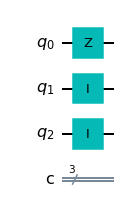

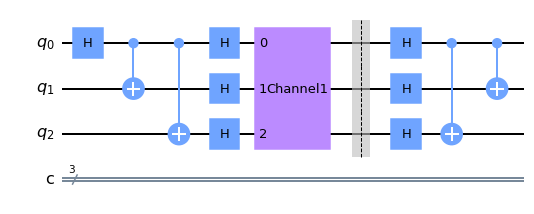

In [599]:
Q1 = QuantumCircuit(3,3)
Q1.h(0)
Q1.cx(0,1)
Q1.cx(0,2)
Q1.h([0,1,2])
Q1 = add_channel_noise(Q1,channel1,1,True)
Q1.barrier()
Q1.h([0,1,2])
Q1.cx(0,2)
Q1.cx(0,1)
Q1.draw(output='mpl')

### For qubit 2
- **OBSERVATION** : The errors that will affect the state of the qubit 2 are only ever going to be the errors when an *X* gate has been introduced erroneously, as said before.
- This implies that only the **bit - flip correction** code needs to be used pertaining to the qubit 2.
- A quantum circuit with 2 ancilla qubits is thus built for the proper 3-bit encoding of the qubit 2 with the noisy channel being the channel 2
- Note that pertaining to our *low probability assumption*, the probability of more than a single qubit being flipped is negligible


Channel noise 2 :


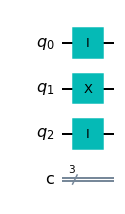

Qubit 2


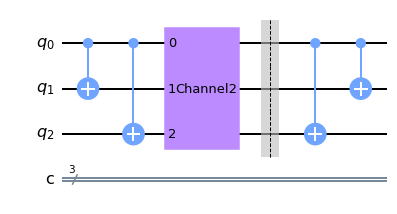

In [602]:
# making the circuit for second bit
Q2 = QuantumCircuit(3,3)
Q2.cx(0,1)
Q2.cx(0,2)
Q2 = add_channel_noise(Q2,channel2,2,True)
Q2.barrier()
Q2.cx(0,2)
Q2.cx(0,1)
print("Qubit 2")
Q2.draw(output='mpl')

### Encoded State

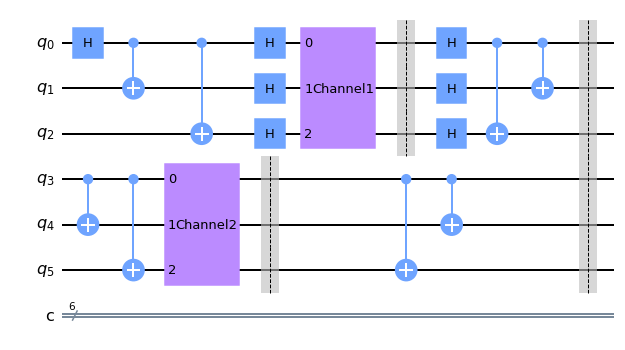

In [603]:
Q = QuantumCircuit(6,6)
Q = Q.compose(Q1,[0,1,2],[0,1,2])
Q = Q.compose(Q2,[3,4,5],[3,4,5])
Q.barrier()
display(Q.draw(output='mpl'))


## Channel Assumptions
- The below image is explanation of what was identified as the recieving and the transmission ends in the circuit.
- Everything after the **Noise Barriers** is done at the recieving end of the quantum state
- The procedure employed was a bit different from the fact that we are transferring the Bell State across our channel and **recieving end** starts after we have entangled Qubit 0 and Qubit 3.

- This was my assumption for this task and thought that this is a possible reasoning as applying a Cx gate to the Qubit 0 and Qubit 3 can be done after the procedure for correction is completed.

- **THE Cx gate is applied to entangle the LOGICAL QUBITS at the recieving end after we have corrected for the errors recieved from the gates**

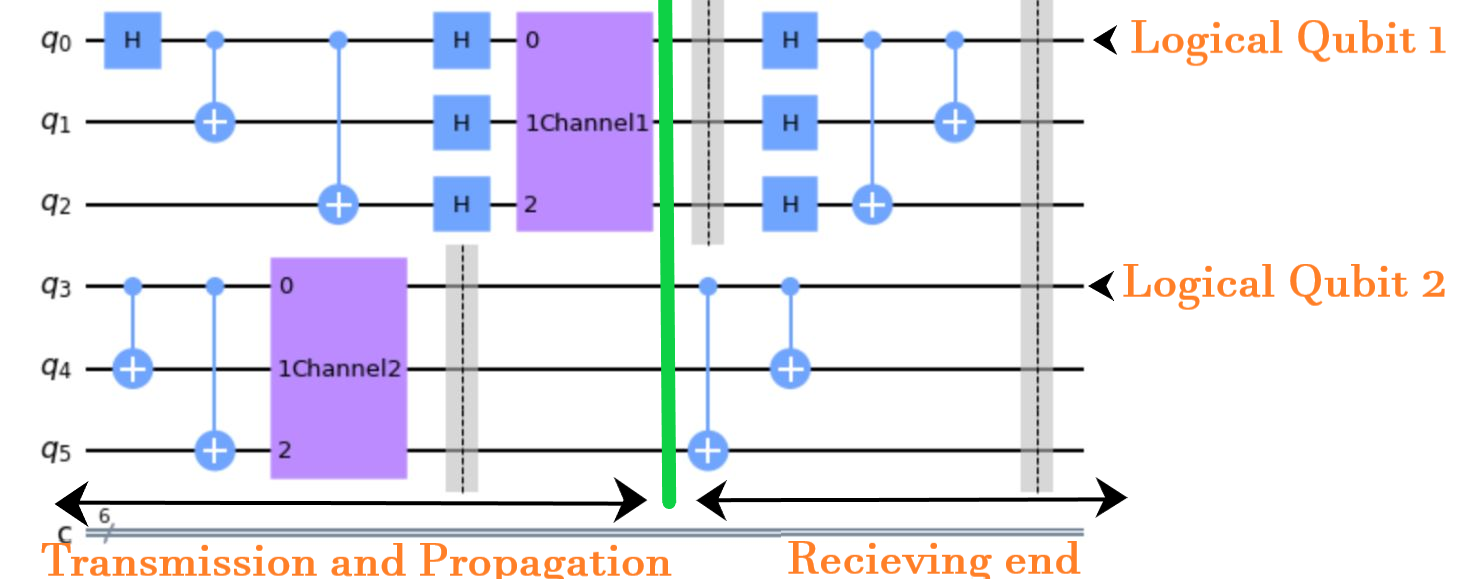

In [518]:
Image("transmitting_recieving.png",width = 600, height = 500)

## Correcting procedures
- Since the qiskit notation is **big endian**, the most significant bit pertains to Q5 and least significant bit pertains to Q0.
- Separate procedures are employed for the qubit 0(the first qubit) and qubit 3(the second qubit)
- Note that **step by step syndrome measurements are required** for identification of the errors 


### Qubit 1
- A correction procedure corresponding to projective measurements is done
- We observe that the qubit **sign flip** gets converted to the **bit flip** in the Hadamard Basis and thus a simple detection of the bit flip in the first 3 qubits would suffice to generate the correcting circuit.
- The projective measurement is done for the qubit 1,2(ancillae)
- *An error detection procedure is to measure the two ancillae and an error correction procedure is to apply a bit flip to the first qubit if the ancillae are in the state* $$|1\rangle \otimes |1\rangle$$ *and then, in all cases where a phase flip has occurred, throw out both ancillae and replace them with fresh ancillae initialized in the state* $$|0\rangle \otimes |0\rangle$$ (basically flip both to |0>)
- This provides us with the information which qubit was actually flipped in the hadamard basis and we apply a simple **X** gate in front of the flipped qubit to correct it.

In [589]:
def get_correction_1(Q):
    '''PARAMETERS : Q-> Quantum Circuit containing the transferred encoded 
                        circuit
       RETURNS : A Quantum Circuit with the correction circuit attached for the first 
                 3 qubits.'''
    # apply projective measurements on the first three qubits
    Q.measure([1,2],[1,2])
    Q.barrier()
    # execute the circuit pertaining to this measurement 
    counts = execute(Q,backend = Aer.get_backend('qasm_simulator')).result().get_counts()
#     print("Current circuit counts :",counts)
    keys = list(counts.keys()) 
    first = keys[0][4] # first ancilla
    second = keys[0][3] # second ancilla
    main_flip = False # boolean to determine whether first was flipped or not
    if first == second and first == '1':
        main_flip = True 
    if(main_flip == True):
        Q.x([0,1,2]) # flip ancillae and flip main bit
    else:
        if first == '1':
            Q.x(1) # flip the state
        else:
            Q.x(2) # flip the state
    Q.barrier()
    return Q  
    

### Qubit 2
- A correction procedure to the corresponding projective measurements(Q3,Q4,Q5) -

$$ |000\rangle : no\ correction\ required\$$

$$ |100\rangle\: X\ gate\ on\ qubit2$$

$$ |010\rangle\: X\ gate\ on\ qubit1$$

$$ |110\rangle : X\ gate\ on\ all\ three\ qubits\ $$

- Note that these measurements actually preserve our superposition(if present) as we are only querying for ancillae bits , not the whole state
- Now a correction is applied over our circuit to get back the results

In [590]:
def get_correction_2(Q):
    '''PARAMETERS : Q-> Quantum Circuit containing the transferred encoded 
                        circuit
       RETURNS : A Quantum Circuit with the correction circuit attached for the last 
                 3 qubits.'''
    # apply projective measurements on the last two qubits
    Q.measure([4,5],[4,5])
    Q.barrier()
    # execute the circuit pertaining to this measurement 
    counts = execute(Q,backend = Aer.get_backend('qasm_simulator')).result().get_counts()
#     print("Current circuit counts :",counts)
    keys = list(counts.keys()) 
    first = keys[0][1] # first ancilla
    second = keys[0][0] # second ancilla
    main_flip = False # boolean to determine whether first was flipped or not
    if first == second and first == '1':
        main_flip = True 
    if(main_flip == True):
        Q.x([3,4,5]) # flip ancillae and flip main bit
    else:
        if first == '1':
            Q.x(4) # flip the state
        else:
            Q.x(5) # flip the state
    Q.barrier()
    return Q  
    

## Putting it all together 
- We would require 2 ancilla qubits for the qubit 1 and 2 for qubit 2.
- The given circuit is just a compilation of the above process, just before applying the CNOT gate and getting our Bell State after it has gone through the noisy channel.
- After we apply the correcting procedures and measure the state back, we would be getting the Bell State indeed.

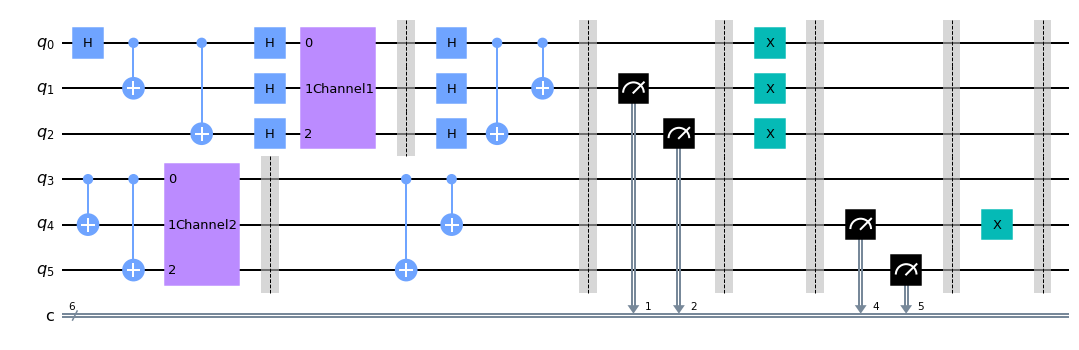

In [604]:
Q = get_correction_1(Q)
Q = get_correction_2(Q)
Q.draw(output = 'mpl')

## Applying Cx and Measuring

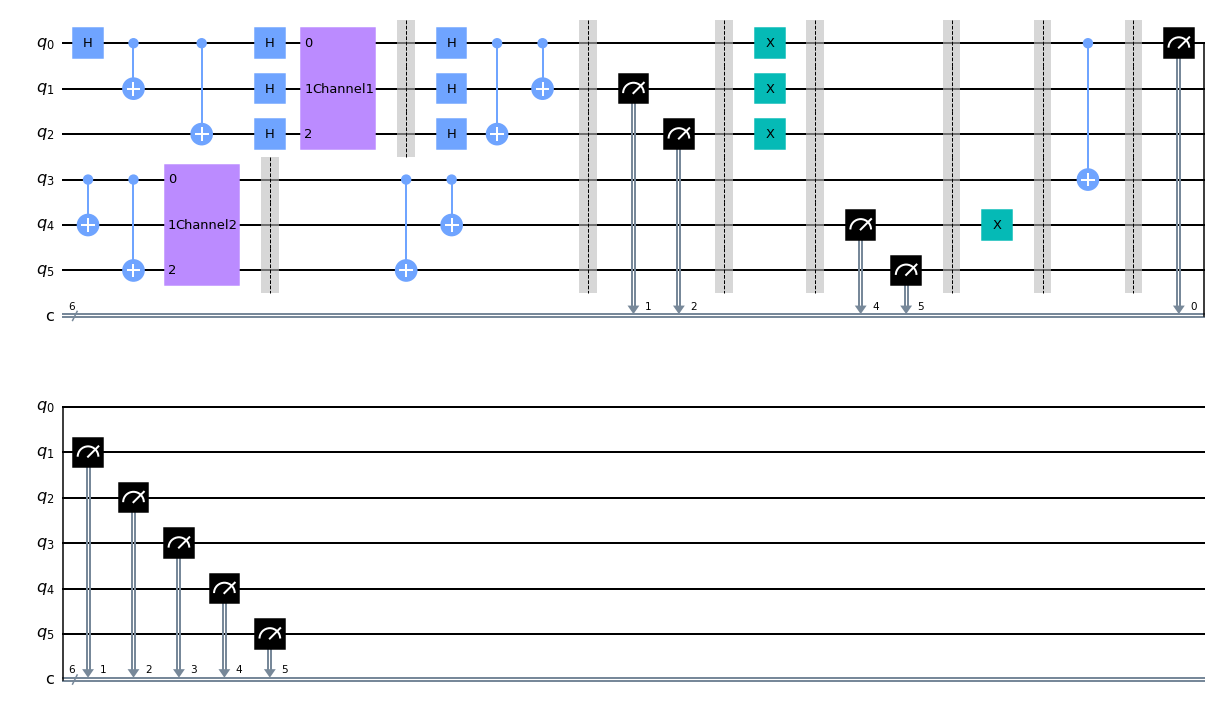

In [605]:
Q.cx(0,3)
Q.barrier()
Q.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
Q.draw(output='mpl')

In [606]:
counts = execute(Q,backend = Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'000000': 520, '001001': 504}


## Subtask 4 and conclusion
- We can see that the measurement **000000 and 001001** represents Bell State for the qubit 0 and qubit 3. This is now validated through the below random 500 experiments which depict the same for the circuit.
- 500 measurements are made for the circuit produced and they are checked against the criteria that the measured states for the qubit 0 and qubit 3 must be **entangled** and either both are **0** or both are **1**
- This actually proves the fact that this circuit corrects arbitrary Z errors on the first and arbitrary X errors on the second qubit and produces the entangled Bell State over the qubits 0 and 3


In [597]:
wrong,correct = 0,0
for i in range(500):   
    # encoding first
    Q1 = QuantumCircuit(3,3)
    Q1.h(0)
    Q1.cx(0,1)
    Q1.cx(0,2)
    Q1.h([0,1,2])
    Q1 = add_channel_noise(Q1,channel1,1,False)
    Q1.barrier()
    Q1.h([0,1,2])
    Q1.cx(0,2)
    Q1.cx(0,1)
    # encoding second
    Q2.cx(0,1)
    Q2.cx(0,2)
    Q2 = add_channel_noise(Q2,channel2,2,False)
    Q2.barrier()
    Q2.cx(0,2)
    Q2.cx(0,1)
    # combining qubits
    Q = QuantumCircuit(6,6)
    Q = Q.compose(Q1,[0,1,2],[0,1,2])
    Q = Q.compose(Q2,[3,4,5],[3,4,5])
    Q.barrier()
    # applying correction
    Q = get_correction_1(Q)
    Q = get_correction_2(Q)
    # applying CX
    Q.cx(0,3)
    Q.barrier()
    Q.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
    # executing
    counts = execute(Q,backend = Aer.get_backend('qasm_simulator')).result().get_counts()
    result = list(counts.keys())
    res1 = result[0]
    res2 = result[1]
    if(res1[2] == res1[5] and res1[2] == '0'):
        # 0 entangled first and second
        zero = True
    if(res2[2] == res2[5] and res2[2] == '1'):
        # 1 entangled first and second 
        one = True 
    if(one and zero):
        correct+=1
    else:
        wrong+=1
print("Correct results :",correct)
print("Incorrect results :",wrong)

Correct results : 500
Incorrect results : 0
